In [2]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [4]:
dataset = pd.read_csv("../dados/Tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
dataset.shape

(14, 5)

In [22]:
grouped = dataset.groupby(['Jogar']).size()
grouped

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

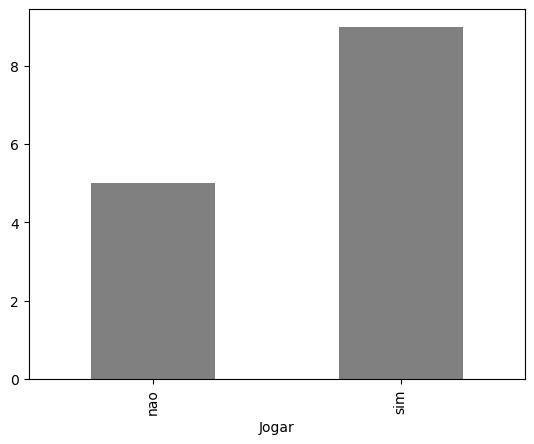

In [23]:
grouped.plot.bar(color = 'gray')

In [29]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [31]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [33]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [34]:
dataset['Umidade'].fillna(mediana, inplace=True)

In [37]:
dataset['Vento'].isnull().sum()

1

In [40]:
grouped = dataset.groupby(['Vento']).size()
grouped

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [44]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [45]:
dataset['Vento'].isnull().sum()

0

In [49]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [51]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [55]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [57]:
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [76]:
dataset.loc[(dataset['Temperatura'] <  0 )  | ( dataset['Temperatura'] >  120), 'Temperatura'] = mediana

In [77]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar,Idade
9,chuva,75.0,200.0,FALSO,sim,82.5


In [78]:
mediana = sts.median(dataset['Umidade'])
mediana

82.5

In [79]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [80]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar,Idade


In [93]:
grouped = dataset.groupby(['Jogar']).size()
grouped

Jogar
nao     4
sim    10
dtype: int64

In [94]:
dataset.loc[dataset['Jogar'] ==  73.5, 'Jogar'] = "sim"


In [97]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar,Idade
0,sol,85.0,85.0,FALSO,nao,82.5
1,sol,80.0,90.0,VERDADEIRO,nao,82.5
2,nublado,83.0,86.0,FALSO,sim,82.5
3,chuva,70.0,85.5,FALSO,sim,82.5
4,chuva,68.0,80.0,FALSO,sim,82.5


/var/folders/cz/smcw8555005__4c97ty3y1tm0000gn/T/ipykernel_1435/242211472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_title('Jogar')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Jogar')

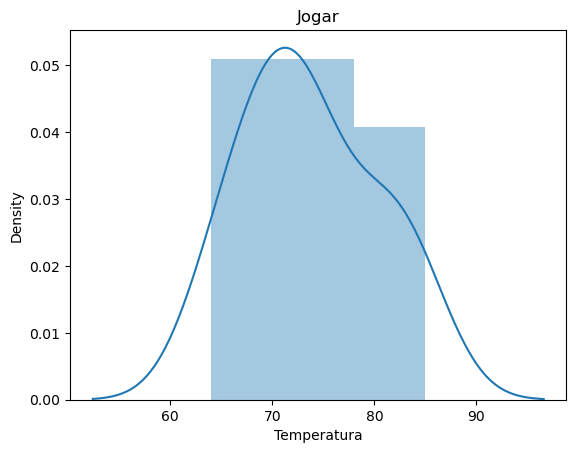

In [104]:
srn.distplot(dataset['Temperatura']).set_title('Jogar')